#                                  Kenya Real Estate Prices Prediction

## Session 4: Exploring the data

In this session, the scraped data will be explored with the help of visualization libraries like ```Seaborn``` and ```matplotlib```. This will enable us to understand the Real Estate Data that we collected.

### Objectives:
* Explore the data
* See if there are features (variables) that have a strong relationship with the price. 

Import some useful libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Exploratory Data Analysis

Load the Real Estate Data

In [2]:
df = pd.read_csv('Real_Estate_Data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6944 entries, 0 to 6943
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          6944 non-null   object 
 1   URL            6944 non-null   object 
 2   Bedrooms       4581 non-null   float64
 3   Bathrooms      3835 non-null   float64
 4   Location       6944 non-null   object 
 5   Property Type  6944 non-null   object 
 6   Price ($)      6881 non-null   float64
 7   Size (m²)      2543 non-null   float64
 8   County         5696 non-null   object 
dtypes: float64(4), object(5)
memory usage: 488.4+ KB


Let us see what our data looks like in tabular form.

In [3]:
df

,Title,URL,Bedrooms,Bathrooms,Location,Property Type,Price ($),Size (m²),County
0,5 Bedroom House For Sale In Parklands,https://www.buyrentkenya.com/listings/5-bedroo...,5.0,3.0,"Off 2nd Parklands, Parklands, Westlands",House,362850.97,NaN,Nairobi
1,Land For Sale In Kilifi,https://www.buyrentkenya.com/listings/land-for...,NaN,NaN,"Kilifi, Kilifi North",Land,302375.81,NaN,Kilifi
2,0.5 Ac Land For Sale In Tigoni,https://www.buyrentkenya.com/listings/05-ac-la...,NaN,NaN,"Tigoni, Tigoni, Limuru",Land,86393.09,NaN,Kiambu
3,3 Bedroom Apartment For Sale In Thindigua,https://www.buyrentkenya.com/listings/3-bedroo...,3.0,NaN,"Thindigua, Thindigua",Apartment,112311.02,NaN,NaN
4,2 Bedroom Apartment For Sale In Kilimani,https://www.buyrentkenya.com/listings/2-bedroo...,2.0,2.0,"Kilimani, Dagoretti North",Apartment,99352.05,125.0,Nairobi
...,...,...,...,...,...,...,...,...,...
6939,5 Bedroom House For Sale In Ngong,https://www.buyrentkenya.com/listings/5-bedroo...,5.0,6.0,"Ngong, Kajiado North",House,129589.63,NaN,Kajiado
6940,500 M² Residential Land For Sale In Ongata Rongai,https://www.buyrentkenya.com/listings/500-m2-r...,NaN,NaN,"Ongata Rongai, Kajiado North",Land,30237.58,500.0,Nakuru
6941,1 Bedroom Apartment For Sale In Kileleshwa,https://www.buyrentkenya.com/listings/1-bedroo...,1.0,1.0,"Kileleshwa, Kileleshwa, Dagoretti North",Apartment,56155.51,66.0,Nairobi
6942,5 Bedroom Villa For Sale In Lavington,https://www.buyrentkenya.com/listings/5-bedroo...,5.0,5.0,"Lavington, Dagoretti North",House,734341.25,NaN,Nairobi


### 1. Visualize relationships between Variables

Create a correlation matrix using Pearson's Correlation. Then save the matrix as a data frame in the variable ```cor```.

This will show the correlation of all our numerical data:

In [4]:
df_2 = df[['Bedrooms', 'Bathrooms', 'Price ($)', 'Size (m²)']]
cor = df_2.corr(method='pearson')

Visualize the correlation using a Heat Map. **1** means that there is a very strong positive correlation, while **-1** means that there is a very strong negative correlation. **0** indicates that there is no relationship between the two variables.

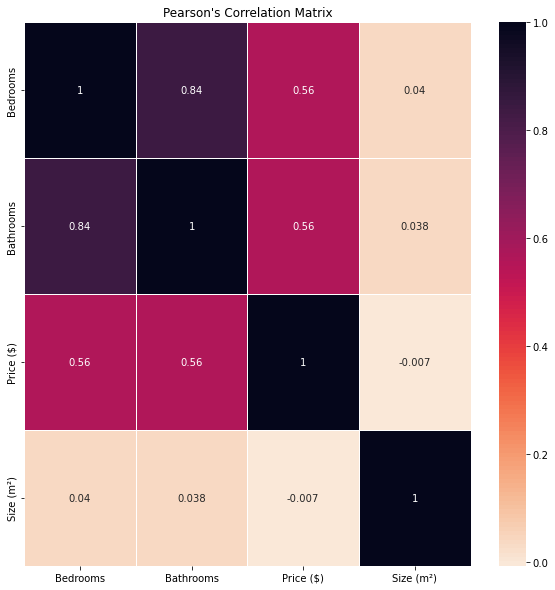

In [5]:
plt.figure(figsize=(10,10))

# creating a colormap
col = sns.color_palette("rocket_r", 125)

sns.heatmap(cor, annot=True, linewidths=1, cmap=col)
plt.title("Pearson's Correlation Matrix" );

**Observation**:


The number of Bedrooms and Bathrooms appear to be moderately correlated with Prices. It is interesting to see that the prices were not influenced by the size of the property. This may indicate that there are other factors influencing the sellers to list these prices.

### 2. Distributions of Bedrooms and Bathrooms

Let us view the distributions of bedrooms and bathrooms

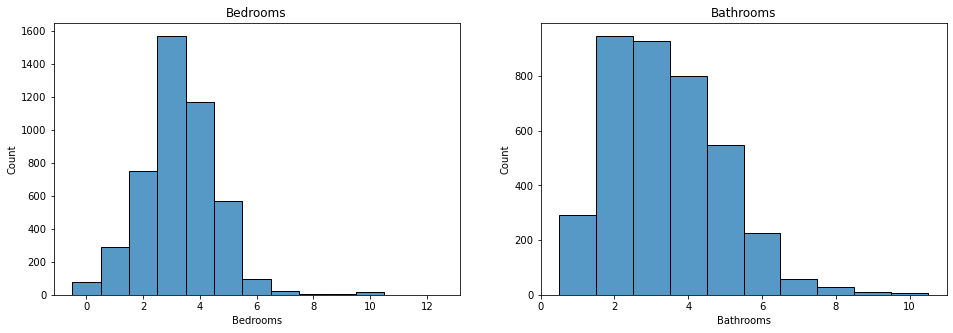

In [6]:
figure, axis = plt.subplots(1, 2, figsize=(16, 5))


sns.histplot(data=df, x='Bedrooms', ax=axis[0], discrete=True)
axis[0].set_title('Bedrooms')

sns.histplot(data=df, x='Bathrooms', ax=axis[1], discrete=True)
axis[1].set_title('Bathrooms');

**Obseravtions:**

It seems that most properties have between 3 and 4 bedrooms. There are fewer properties with a number of bedrooms less than or greater than 3 bedrooms.

In contrast, the left skew of the graph on the **right**, indicates that most most properties have a bathroom number less than or equal to 4.

### 3. Size compared to Bedrooms and Bathrooms

Let us check whether the number of bedrooms or bathrooms will influence the size of the property.

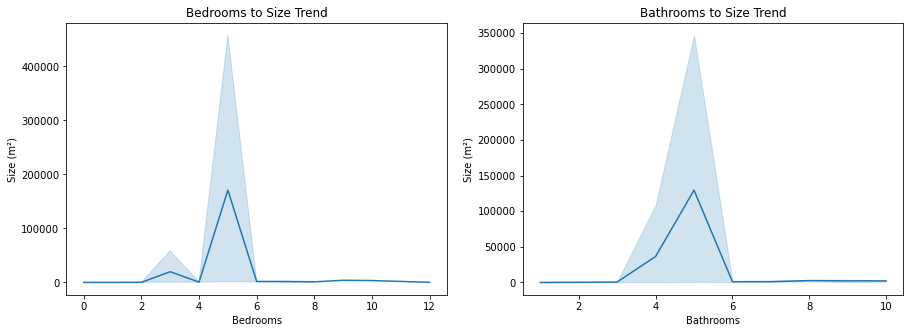

In [7]:
# exclude land data from dataframe because plots of land to do not have bedrooms and bathrooms
df_2 = df[df['Property Type'] != 'Land']

# exclude properties where Size contains null values.
df_2 = df_2[df_2['Size (m²)'].notnull()]

figure, axis = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(data=df_2, x='Bedrooms', y='Size (m²)', ax=axis[0])
axis[0].set_title('Bedrooms to Size Trend')

sns.lineplot(data=df_2, x='Bathrooms', y='Size (m²)', ax=axis[1])
axis[1].set_title('Bathrooms to Size Trend');


**Observation:**

It appears that the number of Bedrooms and Bathrooms do not increase with size of the property. There may be other factors influencing size of the property.

### 4. Prices vs Property Type

Let us now visualize the distribution of these prices according to their property type.

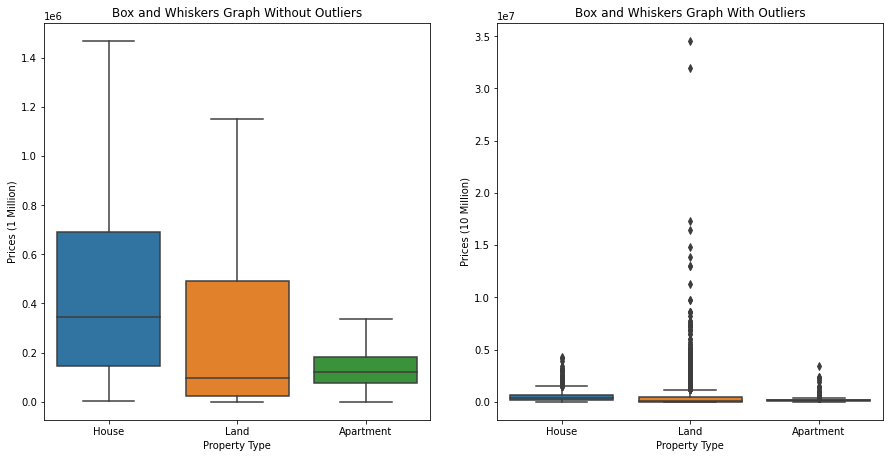

In [8]:
figure, axis = plt.subplots(1, 2, figsize=(13, 7))

# Box and Whiskers Graph Without Outliers
sns.boxplot(y=df['Price ($)'], x=df['Property Type'], data=df, showfliers=False, ax=axis[0])
axis[0].set_title('Box and Whiskers Graph Without Outliers')
axis[0].set_ylabel('Prices (1 Million)')

# Box and Whiskers Graph With Outliers
sns.boxplot(y=df['Price ($)'], x=df['Property Type'], data=df, ax=axis[1])
axis[1].set_title('Box and Whiskers Graph With Outliers')
axis[1].set_ylabel('Prices (10 Million)')

# space between graphs
plt.tight_layout(pad=3);

**Observation**:

Looking at the graph on the **left**, we can see that houses tend to have higher prices, followed by Land (plots for sale) and Apartments. This matches our real world understanding of Real Estate since Houses which have an added value of constructed shelter will tend to be more expensive. 

However if we look at the graph on the **right**, we can see that the most expensive properties are plots of land. These prices are outliers (they don't reflect the majority of the properties). This means that there's a select group of sellers hiking up prices compared to the majority of property prices.

## Authors

<a href="https://www.linkedin.com/in/molomunyansanga/">Molo Munyansanga</a> is a Data Science enthusiast with certificates in Statistics, Data Science and Machine Learning. He is also enrolled in the Deep Learning Specialization by DeepLearning.AI

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description      |
| ----------------- | ------- | ------------- | ----------------------- |
| 2022-05-09        | 1       | Molo. M       | Created Notebook and Completed Tasks         |